#### **Daniils Grisulonoks**

# **World's 50 Best Restaurants Dataset (2002 - 2023)**

**Dataset Overview**: This dataset contains rankings of the World’s 50 Best Restaurants from 2002 to 2023, highlighting global culinary excellence. The list is compiled from the votes of over **1,000 experts** across **27 regions**.

---

### **Key Challenges for Restaurants**
- **Staying Relevant**: Constantly evolving to meet changing tastes.
- **Competition**: Intense global rivalry for recognition.
- **Innovation Pressure**: Continual need for creativity and evolution.

---

**Kaggle Dataset Link**: [World's Best Restaurants Dataset](https://www.kaggle.com/datasets/thomasfranois/worlds-best-restaurants?resource=download)


<i>Loading necessary libraries and reading dataset</i>

In [57]:
import pandas as pd 
import numpy as np 
import folium
import plotly.express as px
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import HTML 
import geopandas as gpd
import geodatasets
from shapely.geometry import Point

df = pd.read_csv("/Users/d.grisulonoks/Documents/WorldsBestRestaurants.csv", index_col=None)

## **Global Distribution of Top 50 Restaurants**

Showcasing the distribution of countries, the map highlights a concentration of **top 50 restaurants** in **Western Europe** and **North America**, with growing influence in **Asia** and **Latin America**. **Africa** and **Australia** are minimally represented, reflecting emerging dining scenes. **Europe** remains the dominant region in fine dining.


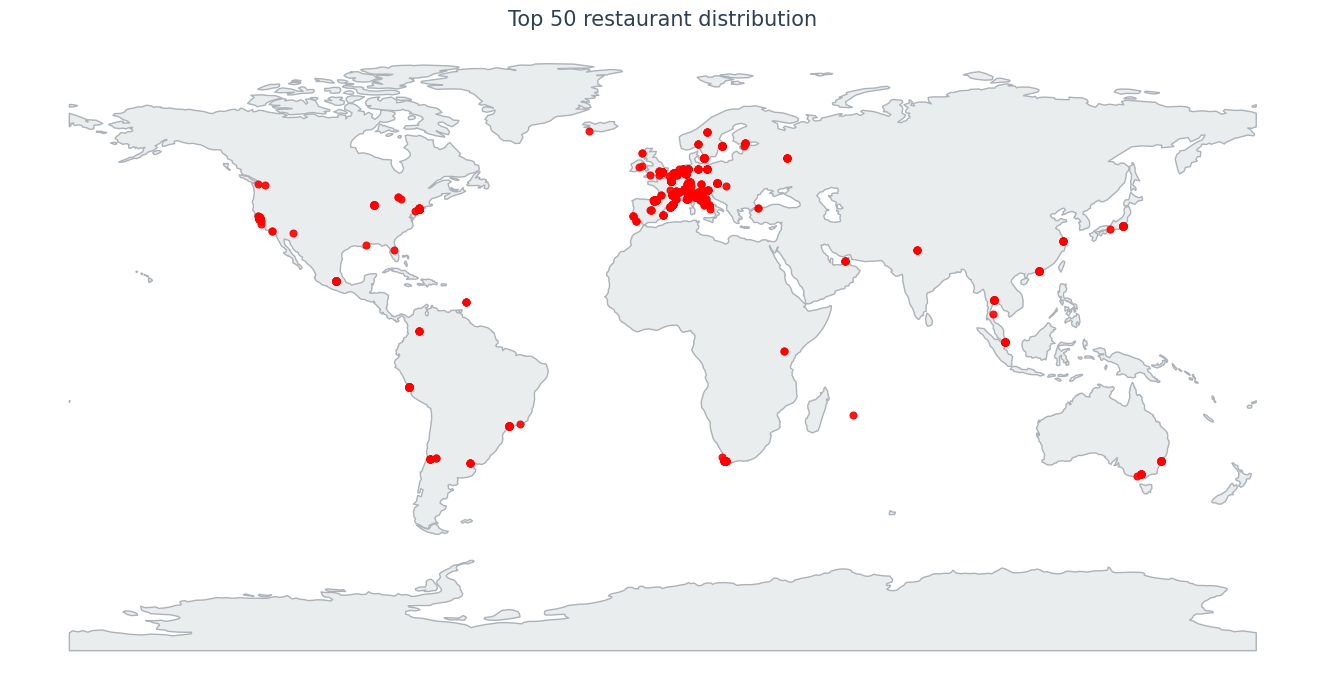

In [58]:
geometry = [Point(xy) for xy in zip(df['lng'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326") 

world_path = geodatasets.get_path("naturalearth.land")
world = gpd.read_file(world_path)

fig, ax = plt.subplots(figsize=(15, 7))  
world.plot(ax=ax, color='#EAEDED', edgecolor='#ABB2B9') 

gdf.plot(ax=ax, color='red', markersize=100, marker='.', linewidth=0.8, alpha=0.9)


ax.set_title('Top 50 restaurant distribution', fontsize=15, color='#2E4053')
ax.set_axis_off()  # Turn off axis


plt.tight_layout()
plt.show()


## **Shifts in the World's Best Restaurants Over Time**

This chart shows how the **world's best restaurant** has shifted over time. **El Bulli** led the early 2000s, shaping the future of modern dining. Then, **Noma** took over, revolutionizing **Nordic cuisine** for much of the 2010s. Later, **Osteria Francescana** and **El Celler de Can Roca** shared the spotlight, representing **Italian** and **Spanish innovation**. Recently, places like **Geranium** and **Central** signal a more global spread, with **Peru** now in the mix. It’s a clear shift from **European dominance** to more diverse global recognition.


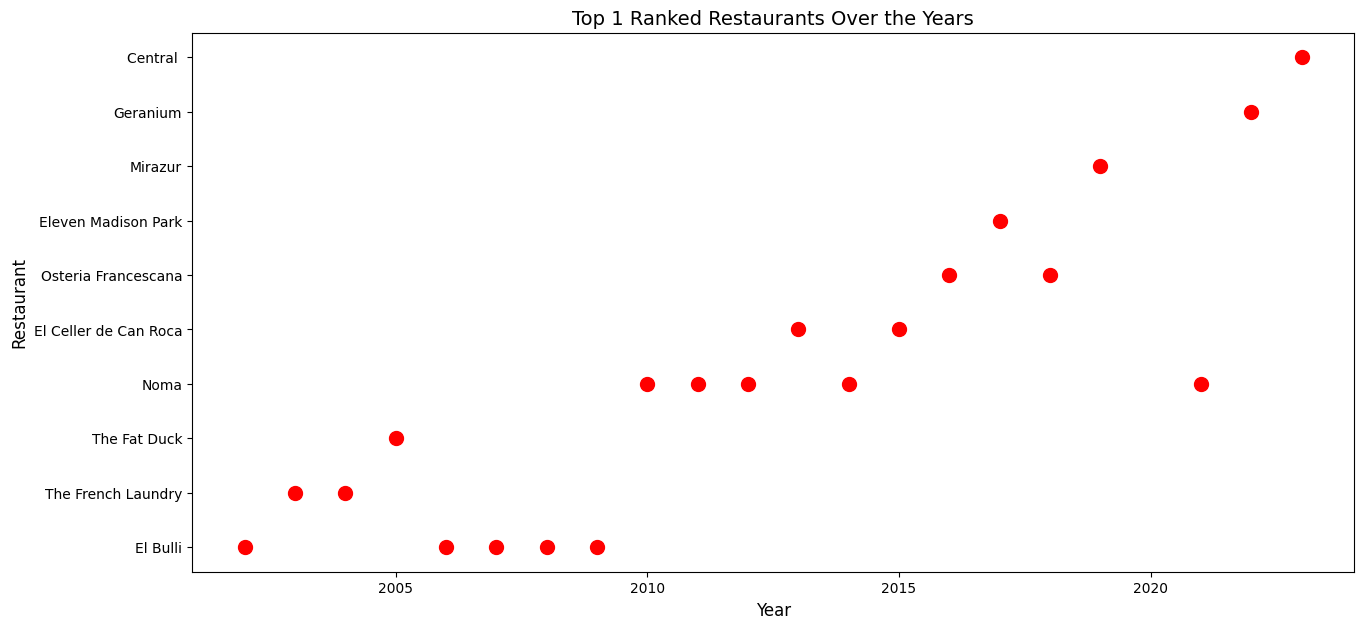

In [59]:
top_one_restaurants = df[df['rank'] == 1]
top_one_restaurants_data = top_one_restaurants[['year','rank', 'restaurant', 'country','location']]


years = top_one_restaurants['year']
restaurants = top_one_restaurants['restaurant']

# Create the plot
fig, ax = plt.subplots(figsize=(15, 7))

# Plot year points on x-axis, corresponding restaurant names on y-axis
ax.scatter(years, restaurants, color='red', s=100)

# Customizing the axes and formatting
ax.set_title('Top 1 Ranked Restaurants Over the Years', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Restaurant', fontsize=12)

plt.show()

## **The Rise and Fall of Top Restaurants**

Across all three charts, the message is clear: **staying on top is as hard as getting there**. Restaurants rise through bursts of innovation, redefining trends, but fall just as quickly as tastes shift and competition heats up. Only a few, like **The French Laundry** and **Noma**, have managed to sustain their success, continuously reinventing themselves to stay relevant.

Meanwhile, others experience **fleeting moments of brilliance**, only to be overtaken by emerging restaurants and regions that bring fresh ideas to the table. These charts highlight the **dynamic and ruthless nature** of fine dining, where only the most adaptable and creative restaurants can thrive at the top for long.


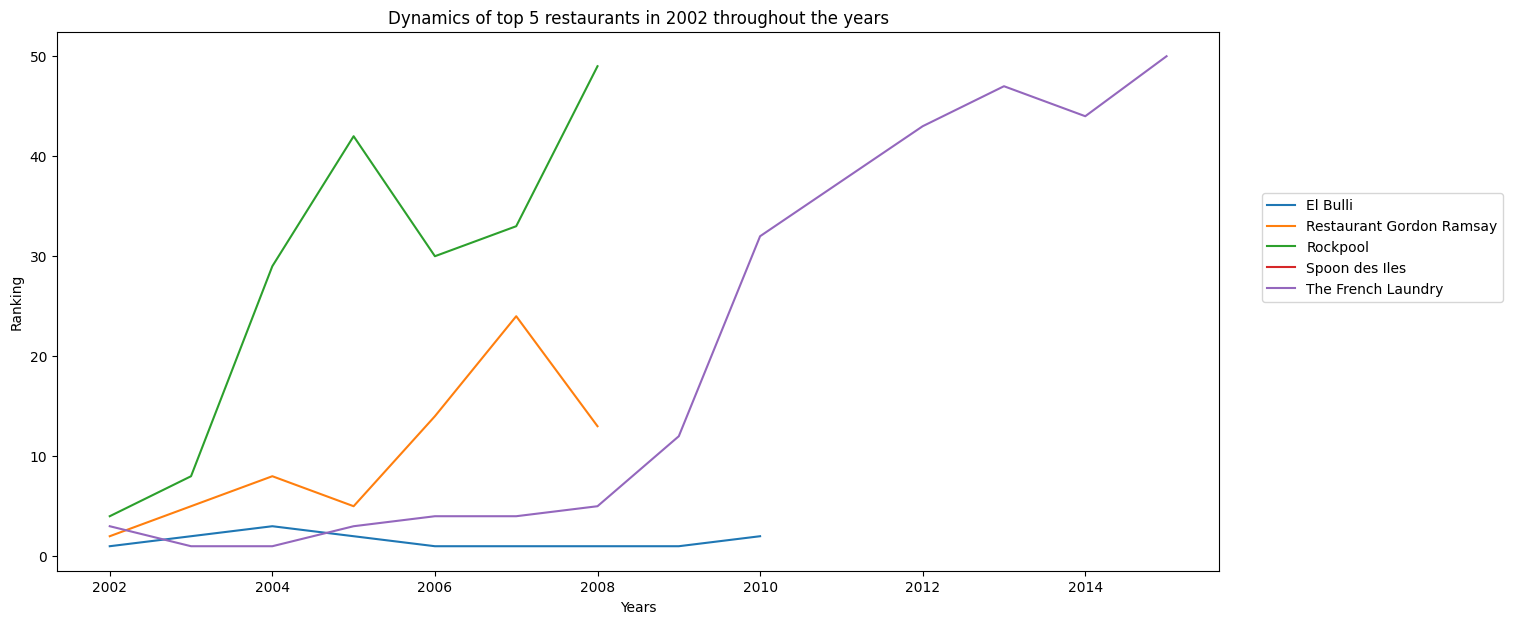

In [60]:
earliest_top_five = df[(df['rank'].isin([1,2,3,4,5]))&(df['year'] == 2002)]
earliest_top_five_names = earliest_top_five[['restaurant']]
earliest_top_five_names_list = earliest_top_five_names['restaurant'].values[:]

earliest_top_five_through_years = df[df['restaurant'].isin(earliest_top_five_names_list)==True]

earliest_top_five_through_years.pivot(index = 'year', columns = 'restaurant', values ='rank').plot(kind='line', figsize=(15,7))
plt.xlabel('Years')
plt.ylabel('Ranking')
plt.title('Dynamics of top 5 restaurants in 2002 throughout the years')
plt.legend(bbox_to_anchor = (1.25, 0.6), loc='center right')
plt.show()

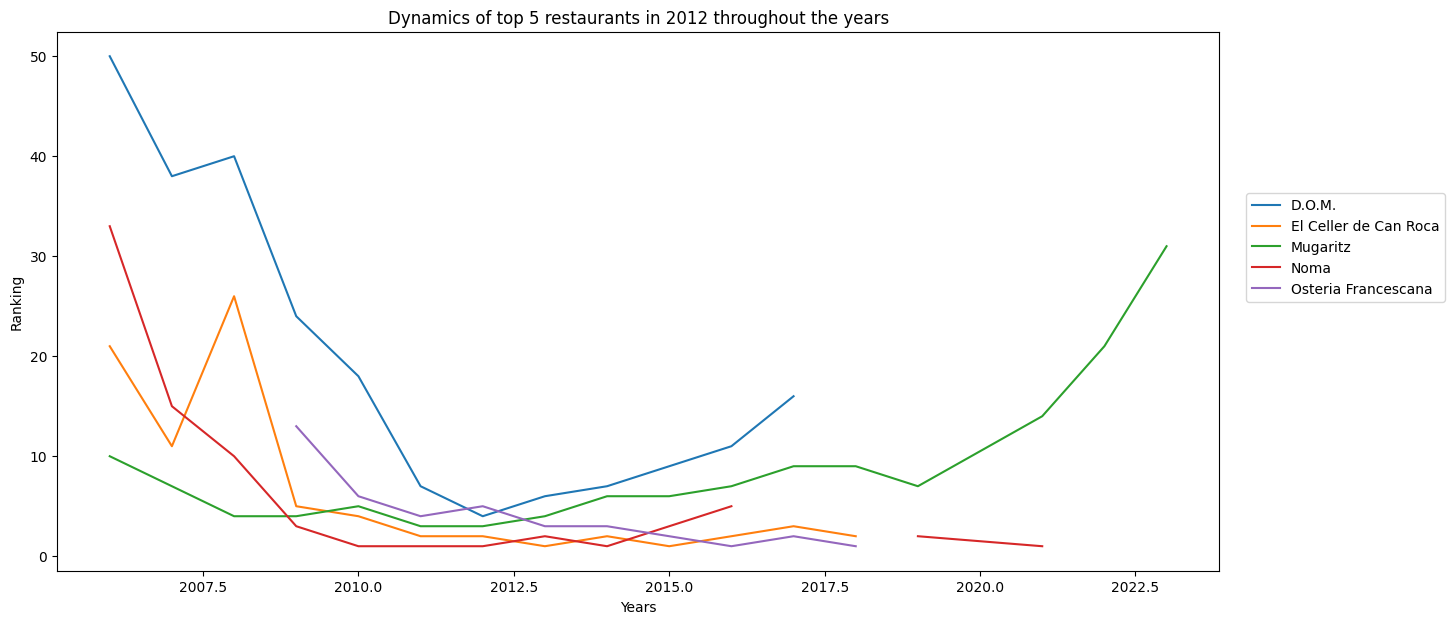

In [61]:
middle_top_five = df[(df['rank'].isin([1,2,3,4,5]))&(df['year'] == 2012)]
middle_top_five_names = middle_top_five[['restaurant']]
middle_top_five_names_list = middle_top_five_names['restaurant'].values[:]

middle_top_five_through_years = df[df['restaurant'].isin(middle_top_five_names_list)==True]

middle_top_five_through_years.pivot(index = 'year', columns = 'restaurant', values ='rank').plot(kind='line', figsize=(15,7))
plt.xlabel('Years')
plt.ylabel('Ranking')
plt.title('Dynamics of top 5 restaurants in 2012 throughout the years')
plt.legend(bbox_to_anchor = (1.2, 0.6), loc='center right')
plt.show()

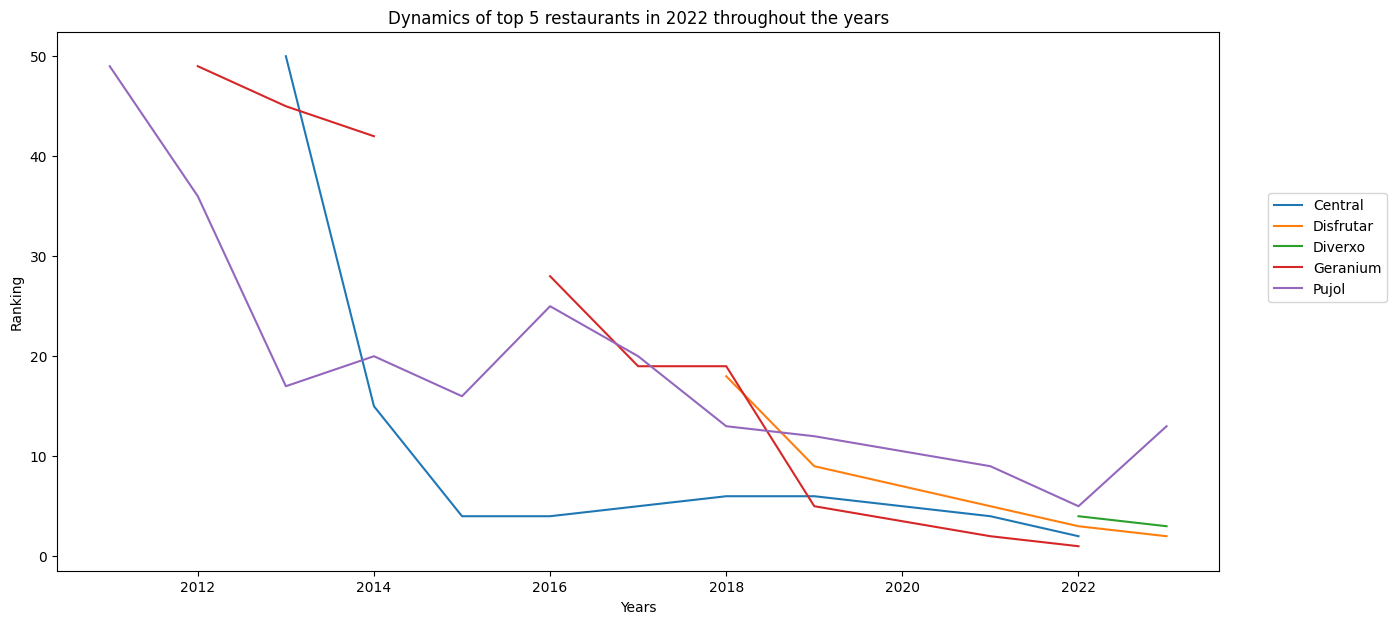

In [62]:
last_top_five = df[(df['rank'].isin([1,2,3,4,5]))&(df['year'] == 2022)]
last_top_five_names = last_top_five[['restaurant']]
last_top_five_names_list = last_top_five_names['restaurant'].values[:]

last_top_five_through_years = df[df['restaurant'].isin(last_top_five_names_list)==True]

last_top_five_through_years.pivot(index = 'year', columns = 'restaurant', values ='rank').plot(kind='line', figsize=(15,7))
plt.xlabel('Years')
plt.ylabel('Ranking')
plt.title('Dynamics of top 5 restaurants in 2022 throughout the years')
plt.legend(bbox_to_anchor = (1.15, 0.6), loc='center right')
plt.show()

## **The Legends of Fine Dining**

It’s clear that two legends dominate the list: **Noma** and **El Bulli**. Both restaurants reached the coveted **#1 spot** an impressive **five times**, setting the gold standard for global fine dining. While **The French Laundry**, **Osteria Francescana**, and **El Celler de Can Roca** each claimed the top position twice, they have also left a lasting impact on the culinary world.


<Figure size 640x480 with 0 Axes>

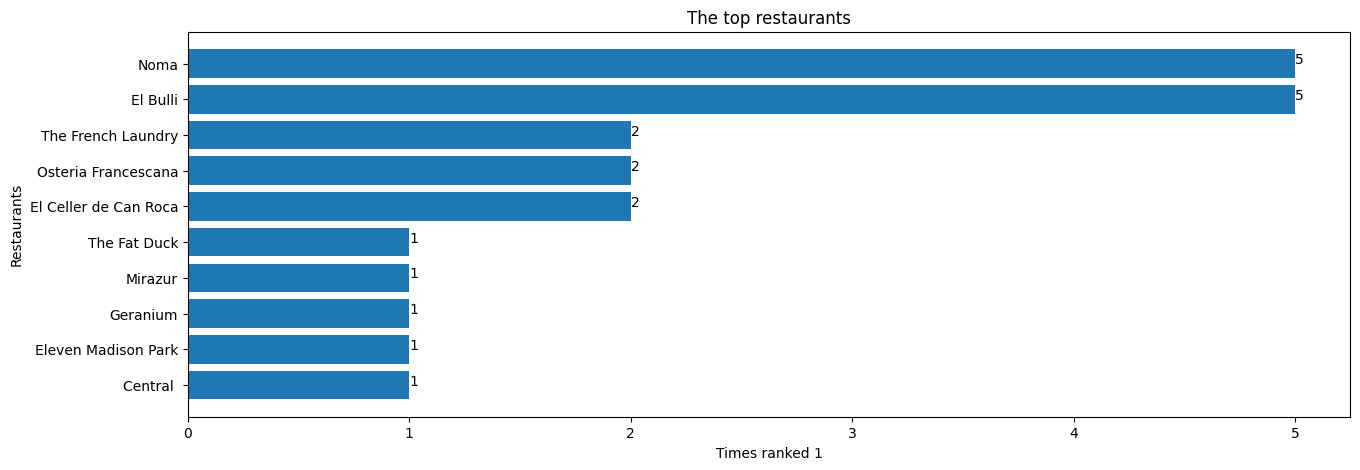

In [63]:
top_one_restaurants_counted = top_one_restaurants_data.groupby(['restaurant'])['restaurant'].count()

top_one_restaurants_counted = top_one_restaurants_counted.reset_index(name='Number 1 Ranked Count').sort_values("Number 1 Ranked Count")

plt.clf()

plt.figure(figsize=(15, 5))

x = top_one_restaurants_counted['restaurant']
y = top_one_restaurants_counted['Number 1 Ranked Count']

plt.barh(x,y)
plt.xlabel("Times ranked 1")
plt.ylabel("Restaurants")
plt.title("The top restaurants")

for index, value in enumerate(y):
    plt.text(value, index,str(value))

plt.show()


## **Consecutive #1 Rankings by Restaurants**

**El Bulli** leads with an impressive **four consecutive years** at the top, followed by **Noma** with three, and **The French Laundry** with two. This visualization showcases the ability of these restaurants to sustain peak performance over multiple years, demonstrating not just quality but also resilience and adaptability in a competitive field.


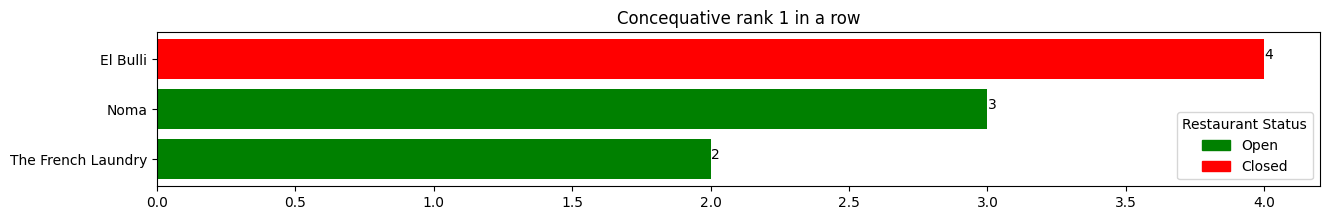

In [64]:
restaurant_status = {
    'El Bulli': 'closed',
    'Noma': 'open',
    'The French Laundry':'open'
}

in_a_row = 0

top_one_restaurants_data = top_one_restaurants_data.reset_index(drop=True)
top_one_restaurants_data['in_a_row'] = 0

for index in range(1, len(top_one_restaurants_data)):
    if top_one_restaurants_data.loc[index, 'restaurant'] == top_one_restaurants_data.loc[index - 1, 'restaurant']:
        in_a_row = in_a_row + 1
    else:
        in_a_row = 1
    top_one_restaurants_data.loc[index,'in_a_row'] = in_a_row
    

streaked_restaurants = top_one_restaurants_data[top_one_restaurants_data['in_a_row']>1]
streaked_restaurants = streaked_restaurants.groupby('restaurant')['in_a_row'].max().reset_index().sort_values('in_a_row')

colors = [ 'green' if restaurant_status.get(restaurant, 'open') == 'open' else 'red' for restaurant in streaked_restaurants['restaurant']]

plt.figure(figsize=(15, 2))

x = streaked_restaurants['restaurant']
y = streaked_restaurants['in_a_row']

bars = plt.barh(x,y, color=colors)

for index, value in enumerate(y):
    plt.text(value, index,str(value))

legend_labels = ['Open', 'Closed']
legend_colors = ['green', 'red']
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=c) for c in legend_colors], labels=legend_labels, title="Restaurant Status")


plt.title("Concequative rank 1 in a row")


plt.show()

## **Average Rankings of Top Restaurants by Country**

The chart shows the **average ranking** of top restaurants from different countries. Countries like **Austria** (15.5), **Monaco** (16.75), and **Denmark** (17.03) lead with the highest average rankings, indicating consistently strong performance from their restaurants. **Spain** and **Peru** follow closely, reflecting their growing influence in the fine dining scene.

Meanwhile, countries like **Brazil**, **France**, **Russia**, **Mexico**, and the **United States** have slightly higher average ranks (around 24), suggesting their top restaurants still perform well but might be less consistent compared to the leading nations. These averages highlight the **global competition** in fine dining, where maintaining a top spot is increasingly competitive.


<Figure size 640x480 with 0 Axes>

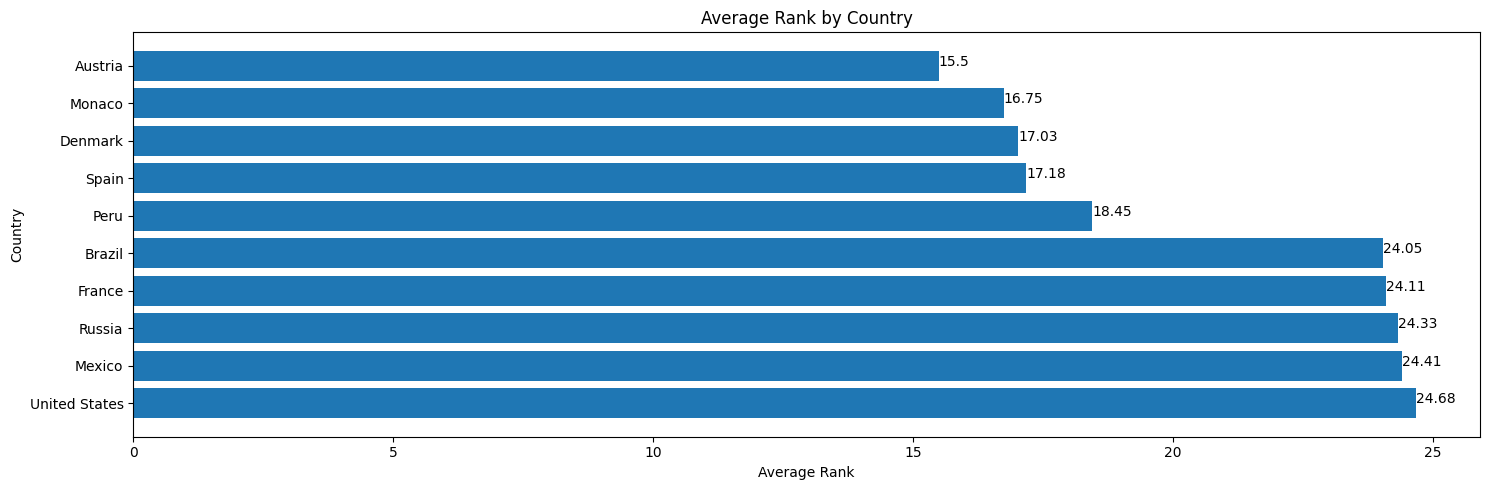

In [65]:
countries = df.groupby('country')['rank'].agg(['sum','count'])

countries['average'] = (countries['sum']/countries['count']).round(2)
countries = countries[countries['count']>=5].sort_values("average",ascending=True).head(10)

countries = countries.reset_index().sort_values("average",ascending=False)
plt.clf()

plt.figure(figsize=(15, 5))
    
x = countries['country']
y = countries['average']

plt.barh(x,y)

for index, value in enumerate(y):
    plt.text(value, index,str(value))

# Set labels and title
plt.xlabel("Average Rank")
plt.ylabel("Country")
plt.title("Average Rank by Country")

plt.tight_layout()

# Show the final plot
plt.show()


## **Unique Number of Restaurants by Country**

This chart shows the **unique number of restaurants** from each country that have appeared in the rankings. The **United States** and **France** lead with **35 unique restaurants** each, reflecting their dominance in the global fine dining scene. Close behind is the **United Kingdom** with **28**.

**Italy** (19) and **Spain** (17) demonstrate strong representation, thanks to their rich culinary traditions. Meanwhile, countries like **Sweden**, **Germany**, **Japan**, **Thailand**, and **Denmark** show a smaller but notable presence, with around **6 to 8 unique restaurants** each. This chart highlights the **geographical diversity** of fine dining, with both traditional powerhouses and emerging culinary nations represented.


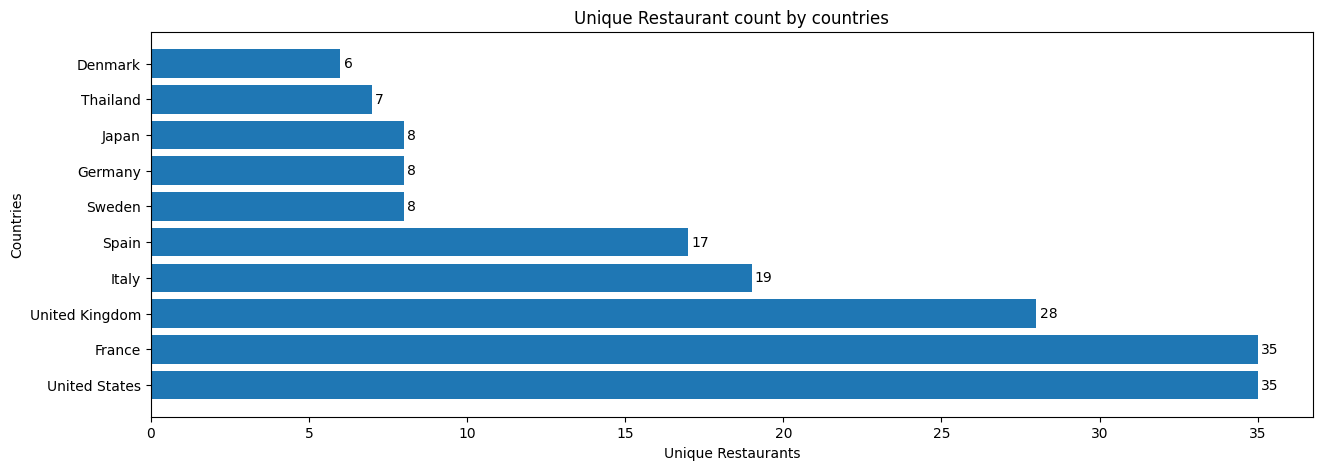

In [66]:
locations = df.groupby('country')['restaurant'].nunique().sort_values(ascending = False).head(10)
locations = locations.reset_index()
locations.rename(columns = {'restaurant':'Unique Restaurants'},inplace = True)

x = locations['country']
y = locations['Unique Restaurants']

# Create the figure before plotting
plt.figure(figsize=(15, 5))

# Plot horizontal bar chart
plt.barh(x, y)

# Annotate bars with text labels
for index, value in enumerate(y):
    plt.text(value + 0.1, index, str(value), va='center')  # Adjust placement using `value` and `index`

# Set labels and title
plt.xlabel("Unique Restaurants")
plt.ylabel("Countries")
plt.title("Unique Restaurant count by countries")

# Display the chart
plt.show()


## **Best Countries to Visit for Food Lovers**

This chart points to the **best countries** to visit for food lovers, offering both **quality and variety** in fine dining:

- **United States**: Known for its large number of top restaurants and solid average rankings, the U.S. is a must-visit for diverse, world-class cuisine.

- **France**: A classic destination, with many highly ranked restaurants, perfect for lovers of refined and traditional dining experiences.

- **Spain**: Balances a high number of acclaimed spots with great average rankings, making it a hotspot for cutting-edge food.

- **Denmark**: Despite fewer locations, its restaurants, like **Noma**, rank among the best, ideal for those seeking innovation.

These countries offer the perfect mix of **culinary excellence** and **variety**, making them top choices for any foodie.


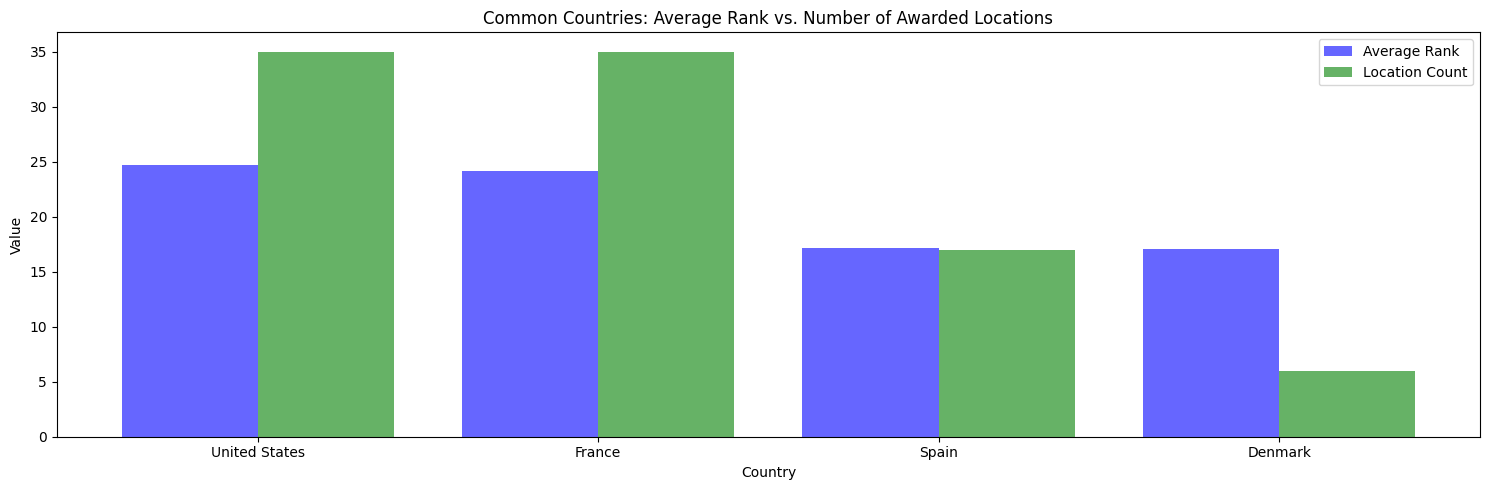

In [67]:
common_countries = pd.merge(countries, locations, on='country')

# Plotting a histogram-like bar plot to showcase the common countries
fig, ax = plt.subplots(figsize=(15, 5))

# Plotting both average rank and location count for common countries
bar_width = 0.4
x = common_countries['country']

# Positions for bars
positions_avg_rank = range(len(x))
positions_location_count = [pos + bar_width for pos in positions_avg_rank]

# Bars for average ranking
plt.bar(positions_avg_rank, common_countries['average'], width=bar_width, label='Average Rank', color='blue', alpha=0.6)

# Bars for location count
plt.bar(positions_location_count, common_countries['Unique Restaurants'], width=bar_width, label='Location Count', color='green', alpha=0.6)

# Setting labels and title
plt.xlabel('Country')
plt.xticks([pos + bar_width / 2 for pos in positions_avg_rank], x)  # Adjust x-axis labels to be in between the two bars
plt.ylabel('Value')
plt.title('Common Countries: Average Rank vs. Number of Awarded Locations')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## **Exploring Top U.S. Restaurant Locations**

Now that we know the **U.S.** is a top destination for foodies, let’s dive deeper into specific locations. **New York** dominates the scene with over half of the top-ranked restaurants, followed by **San Francisco**.

The table below lets you explore these locations further—just select a city to see a list of the standout restaurants from the past five years that made it into the **Top 50**.


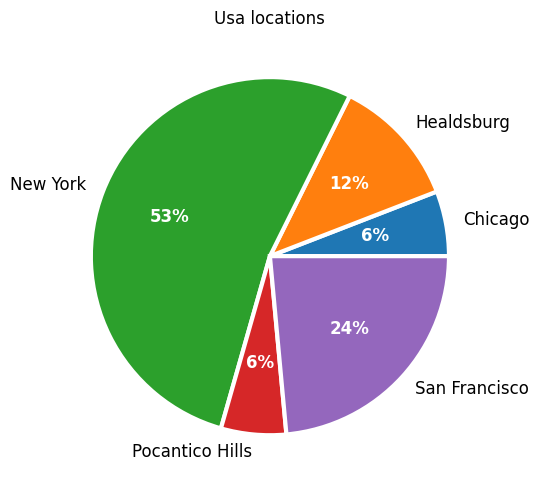

Dropdown(description='Location:', options=('New York', 'Pocantico Hills', 'San Francisco', 'Chicago', 'Healdsb…

Output()

In [73]:
top_5_usa = df[(df['country'] == 'United States')&(df['year'].isin([2019,2020,2021,2022,2023]))]
top_5_usa = top_5_usa[['year','rank','restaurant','location']]


usa_loc = top_5_usa.groupby("location")['restaurant'].count().reset_index()

fig, ax = plt.subplots(figsize=(15, 5))

patches, texts, pcts = ax.pie(usa_loc['restaurant'], labels = usa_loc['location'], autopct='%.0f%%', wedgeprops={'linewidth':3.0, 'edgecolor':'white'}, textprops={'size':'large'})
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('Usa locations', fontsize = 12)
plt.tight_layout()

location_picker = widgets.Dropdown(
    options = top_5_usa['location'].unique(),
    description='Location:', 
    disabled = False
)

# Function to display restaurant details based on selected location
def show_restaurant_info(location):
    filtered_data = top_5_usa[top_5_usa['location'] == location]
    if not filtered_data.empty:
        display(filtered_data)
    else:
        print("No such location exists.")

# Create an interactive output area to reflect dropdown selection
interactive_output = widgets.interactive_output(show_restaurant_info, {'location': location_picker})

# Display the dropdown widget and output together
display(location_picker, interactive_output)

## **Top Restaurant Locations in France**

For France, it’s clear that **Paris** dominates the culinary scene, housing **87%** of the top-ranked restaurants. However, **Menton** and **La Madelaine-sous-Montreuil** each hold a piece of the fine dining pie, with **7%** each.


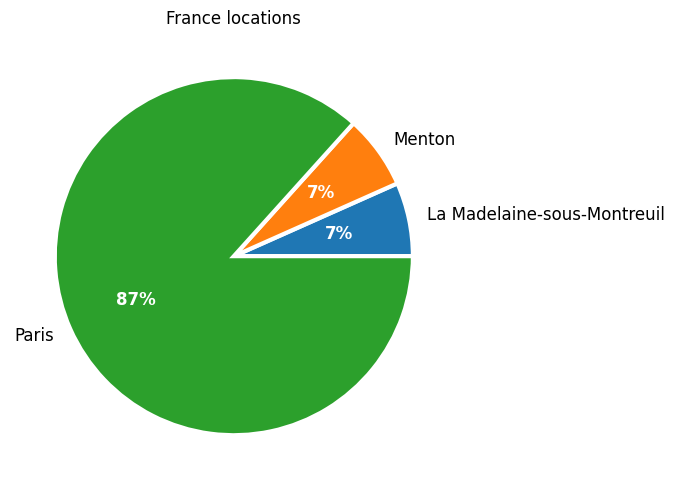

Dropdown(description='Location:', options=('Menton', 'Paris', 'La Madelaine-sous-Montreuil'), value='Menton')

Output()

In [74]:
top_5_france = df[(df['country'] == 'France')&(df['year'].isin([2019,2020,2021,2022,2023]))]
top_5_france = top_5_france[['year','rank','restaurant','location']]

france_loc = top_5_france.groupby("location")['restaurant'].count().reset_index()

fig, ax = plt.subplots(figsize=(15, 5))

patches, texts, pcts = ax.pie(france_loc['restaurant'], labels = france_loc['location'], autopct='%.0f%%', wedgeprops={'linewidth':3.0, 'edgecolor':'white'}, textprops={'size':'large'})
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('France locations', fontsize = 12)
plt.tight_layout()

location_picker = widgets.Dropdown(
    options = top_5_france['location'].unique(),
    description='Location:', 
    disabled = False
)

# Function to display restaurant details based on selected location
def show_restaurant_info(location):
    filtered_data = top_5_france[top_5_france['location'] == location]
    if not filtered_data.empty:
        display(filtered_data)
    else:
        print("No such location exists.")

# Create an interactive output area to reflect dropdown selection
interactive_output = widgets.interactive_output(show_restaurant_info, {'location': location_picker})

# Display the dropdown widget and output together
display(location_picker, interactive_output)

## **Top Restaurant Locations in Spain**

In Spain, the culinary scene is more evenly distributed across various locations. **Barcelona** leads with **20%** of top restaurants, while **Getaria** follows closely at **16%**. Cities like **Madrid**, **Axpe**, and **San Sebastián** also hold significant shares, highlighting the diverse gastronomic offerings across the country.


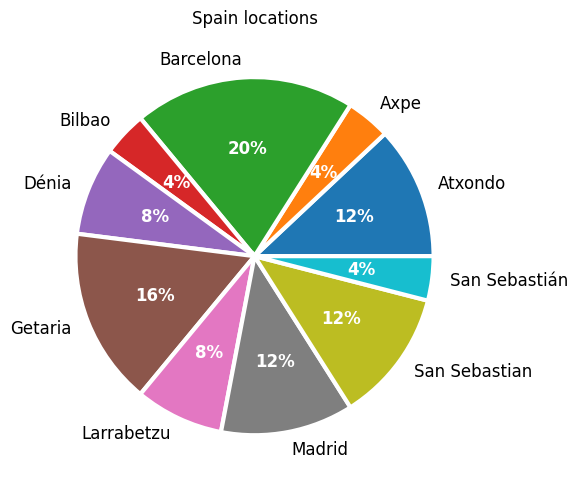

Dropdown(description='Location:', options=('Axpe', 'San Sebastián', 'Barcelona', 'Larrabetzu', 'Getaria', 'Bil…

Output()

In [75]:
top_5_spain = df[(df['country'] == 'Spain')&(df['year'].isin([2019,2020,2021,2022,2023]))]
top_5_spain = top_5_spain[['year','rank','restaurant','location']]

spain_loc = top_5_spain.groupby("location")['restaurant'].count().reset_index()

fig, ax = plt.subplots(figsize=(15, 5))

patches, texts, pcts = ax.pie(spain_loc['restaurant'], labels = spain_loc['location'], autopct='%.0f%%', wedgeprops={'linewidth':3.0, 'edgecolor':'white'}, textprops={'size':'large'})
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('Spain locations', fontsize = 12)
plt.subplots_adjust(left=0.2, right=0.8)
plt.tight_layout()
plt.show()

location_picker = widgets.Dropdown(
    options = top_5_spain['location'].unique(),
     description='Location:', 
    disabled = False
)

def show_restaurant_info(location):
    filtered_data = top_5_spain[top_5_spain['location'] == location]
    if not filtered_data.empty:
        display(filtered_data)
    else:
        print("No such location exists.")

interactive_output = widgets.interactive_output(show_restaurant_info, {'location': location_picker})

display(location_picker, interactive_output)

## **Top Restaurant Locations in Denmark**

In Denmark, the fine dining scene is all about **Copenhagen**—holding **100%** of the top restaurants in the country. From the world-renowned **Noma** to rising stars like **Geranium** and **Alchemist**, all the culinary gems are concentrated in this vibrant city.


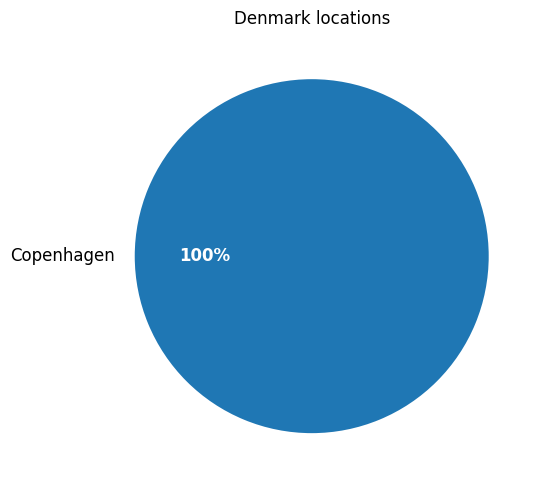

Dropdown(description='Location:', options=('Copenhagen',), value='Copenhagen')

Output()

In [76]:
top_5_denmark = df[(df['country'] == 'Denmark')&(df['year'].isin([2019,2020,2021,2022,2023]))]
top_5_denmark = top_5_denmark[['year','rank','restaurant','location']]

denmark_loc = top_5_denmark.groupby("location")['restaurant'].count().reset_index()

fig, ax = plt.subplots(figsize=(15, 5))

patches, texts, pcts = ax.pie(denmark_loc['restaurant'], labels = denmark_loc['location'], autopct='%.0f%%', wedgeprops={'linewidth':3.0, 'edgecolor':'white'}, textprops={'size':'large'})
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('Denmark locations', fontsize = 12)
ax.set_aspect('equal')
plt.tight_layout()


location_picker = widgets.Dropdown(
    options = top_5_denmark['location'].unique(),
    description = 'Location:',
    disabled = False
)

# Function to display restaurant details based on selected location
def show_restaurant_info(location):
    filtered_data = top_5_denmark[top_5_denmark['location'] == location]
    if not filtered_data.empty:
        display(filtered_data)
    else:
        print("No such location exists.")

# Create an interactive output area to reflect dropdown selection
interactive_output = widgets.interactive_output(show_restaurant_info, {'location': location_picker})

# Display the dropdown widget and output together
display(location_picker, interactive_output)


## **The Dynamic Journey of Fine Dining**

The world of fine dining is a dynamic journey of **ups and downs**. **Noma** continues to thrive, while legends like **El Bulli** left their mark before closing. As the charts show, the best restaurants constantly **rise and fall**, making it essential to experience these culinary gems while they’re still at the top.

That’s why **France**, **Spain**, **Denmark**, and the **United States** stand out as the ultimate destinations for food lovers. These countries offer not only a high number of top restaurants but also **exceptional quality**. Whether you're savoring **Noma's innovation** in Copenhagen or indulging in **Spain’s avant-garde cuisine**, these countries provide **unforgettable dining experiences**. Exploring these culinary hotspots is a must for anyone wanting to touch the **pinnacle of global gastronomy**.
